# CS549 Machine Learning  
## Assignment 1

**Total: 100 points**
- Section 1: 20 points
- Section 2: 15 points
- Section 3: 40 points
- Section 4: 25 points

In this assignment, you will solve several Python and NumPy problems. You are encouraged to refer to the official documentation (Python: [docs.python.org/3](https://docs.python.org/3/); NumPy: [numpy.org/doc](https://numpy.org/doc)) to aid your understanding.

Complete the code cells by filling in the blanks (indicated by `None` or #TODO:...), and ensure that the output matches the expected output.

In addition, some questions require written explanations. These are designed to test your understanding of the concepts.


# Section 1: Python and NumPy Basics  
This section includes the following coding tasks:
- Task 1 (8 pts): Palindrome and character count  
- Task 2 (4 pts): Data normalization  
- Task 3 (5 pts): NumPy slicing and reshaping  
- Task 4 (3 pts): Matrix multiplication with random seed

### **Task 1 (8 points): Palindrome and Character Count**  
Check if the string is a palindrome (ignoring spaces), and count the frequency of each character.

**Expected output example**:
```
Palindrome? False
Character counts: {'m': 2, 'a': 4, 'd': 2, 'l': 1, 'o': 1, 'v': 1, 'e': 1, 's': 1, 't': 1}
```

In [25]:
text = "madam loves data"

#### START YOUR CODE ####
# 1. Check if string is palindrome (ignoring spaces) 
#TODO: remove space (2pts)
text= text.replace(" ", "")
#TODO: check if string is palindrome (2pts)
is_palindrome = text == text[::-1]

# 2. Count frequency of each character (ignore spaces) 
char_counts = {}
for char in text:
    char_counts[char] = char_counts.get(char, 0) + 1

#### END YOUR CODE ####

print("Palindrome?", is_palindrome)
print("Character counts:", char_counts)

Palindrome? False
Character counts: {'m': 2, 'a': 4, 'd': 2, 'l': 1, 'o': 1, 'v': 1, 'e': 1, 's': 1, 't': 1}


### **Task 2 (4 points): Data Normalization**    
Given numerical data, compute mean, standard deviation, and normalized values. Normalization is a common preprocessing step in ML that rescales numerical data into a standard range (e.g., 0 to 1).

**Expected output**:
```
Original Data: [5, 15, 25, 35, 45]
Mean: 25.0, Std: 14.1421
Normalized Data: [0.0, 0.25, 0.5, 0.75, 1.0]
```


In [26]:
import numpy as np
# Given dataset
data = [5, 15, 25, 35, 45]

#### START YOUR CODE ####
# 1. Find the mean and standard deviation values in the list (2 pts, 1pt each)
mean_val = np.mean(data)
std_val = np.std(data)

# 2. Apply Min-Max normalization formula: (x - min) / (max - min). Please use write code for the calculation (2 pts)
dataMin = min(data)
dataMax = max(data)
normalized_data = []
for n in range(len(data)):
    normalized_data.append((data[n]-dataMin)/(dataMax-dataMin))

#### END YOUR CODE ####

print("Original Data:", data)
print("Mean:", mean_val, "Std:", std_val)
print("Normalized Data:", normalized_data)


Original Data: [5, 15, 25, 35, 45]
Mean: 25.0 Std: 14.142135623730951
Normalized Data: [0.0, 0.25, 0.5, 0.75, 1.0]


### **Task 3 (5 points): NumPy Slicing and Reshaping**  
Create an array of numbers 1–20, reshape to 5x4, extract the last two rows, and compute column sums.

**Expected output**:
```
Reshaped array (5x4):
[[ 1  2  3  4]
 ...
 [17 18 19 20]]
Last two rows:
[[13 14 15 16]
 [17 18 19 20]]
Column sums: [45 50 55 60]
```

In [27]:
#### START YOUR CODE ####
# Create array from 1 to 20  (1pt)
arr = np.linspace(1,20,20)

# Reshape into 5x4 (1pt)
arr_reshaped = np.reshape(arr, (5,4))

# Extract last two rows (2pts)
last_two = arr_reshaped[-2:,:]

# Column sums (1pt)
col_sums = np.sum(arr_reshaped,0)
#### END YOUR CODE ####

print("Reshaped array (5x4):\n", arr_reshaped)
print("Last two rows:\n", last_two)
print("Column sums:", col_sums)

Reshaped array (5x4):
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]
 [17. 18. 19. 20.]]
Last two rows:
 [[13. 14. 15. 16.]
 [17. 18. 19. 20.]]
Column sums: [45. 50. 55. 60.]


### **Task 4 (3 points): Matrix Multiplication with Random Seed**  
Generate two 3x3 matrices with random integers using `np.random.seed(42)` and multiply them. Hint: use `np.random.randint`.

**Expected output** (with seed 42):
```
Matrix A:
[[6 3 7]
 [4 6 9]
 [2 6 7]]
Matrix B:
[[4 3 7]
 [7 2 5]
 [4 1 7]]
Result (A*B):
[[...]]
```


In [28]:
np.random.seed(42)

#### START YOUR CODE #### 1pt each line
A = np.random.randint(1,10,(3,3))
B = np.random.randint(1,10,(3,3))
result = A@B
#### END YOUR CODE ####

print("Matrix A:\n", A)
print("Matrix B:\n", B)
print("Result (A*B):\n", result)

Matrix A:
 [[7 4 8]
 [5 7 3]
 [7 8 5]]
Matrix B:
 [[4 8 8]
 [3 6 5]
 [2 8 6]]
Result (A*B):
 [[ 56 144 124]
 [ 47 106  93]
 [ 62 144 126]]


# Section 2: Margin - Calculating the Distances $a$, $b$, and $c$
This section includes 3 tasks:
- Task 5 (5 pts): Calculate and interpret $a$
- Task 6 (5 pts): Calculate and interpret $b$
- Task 7 (5 pts): Calculate and interpret $c$ 

<div style="display: flex; align-items: center;">
    <img src="fall2025_hw1_fig1.png" alt="Homework1 Figure1" width="400"/>
    <p style="margin-left: 20px;"> 
        In this figure, we see a hyperplane defined by the equation $\theta^\top x + \theta_0$, along with a point $ x^* $ located away from the hyperplane. The figure also shows three labeled distances: $a, b, c$. <br><br>
        Using this figure and the relationships between $ a $, $ b $, and $ c $, your task is to answer the following questions step-by-step to interpret and calculate these distances. Finally, use this information to compute the signed distance from the point $ x^* $ to the hyperplane.<br><br>
    </p>
</div>


## Task 5 (5 points):  Write down the formula to calculate $a$, and determine its sign.

**Instruction**: Write down your answer using the Markdown cell below:

#### START YOUR ANSWER ####
$a$ is the dot product of the vector $x^*$, starting at the origin, with the vector $\theta$, and normalized by $\|\theta\|$

 $a= \frac{\theta^T x^*}{\|\theta\|}$ #4pts
 
 $a$ is ...(answer >0 or <0) #1pt

#### END YOUR ANSWER ####

## Task 6 (5 points): Write down the formula to calculate $b$, and determine its sign.

**Instruction**: Write down your answer using the Markdown cell below:

#### START YOUR ANSWER ####
 $\theta^T x + \theta_0 = 0$

 $\theta^T (0) + \theta_0 = b$
 
 Then normalize by $\|\theta\|$, just like with a

 $b = \frac{\theta_0}{\|\theta\|} $ #4pts
 
 $b$ is <0 #1pt

#### END YOUR ANSWER ####

## Task 7 (5 points): Write down the formula to calculate $c$, and determine its sign.
**Hint**: Use the relationship between $a$ and $b$ to determine the value of $c$ (i.e., the **signed** distance from $x^*$ to the hyperplane).

**Instruction**: Write down your answer using the Markdown cell below:

#### START YOUR ANSWER ####

 $c = a + b$ #4pts

 $c = \frac{\theta^T x^*}{\|\theta\|} + \frac{\theta_0}{\|\theta\|} $
 
 $c$ is > 0 #1pt

#### END YOUR ANSWER ####

# Section 3: Algorithm Implementation
This section includes 3 tasks:
- Task 8 (15 pts): Implement the Perceptron Algorithm
- Task 9 (15 pts): Implement the kNN Algorithm from Scratch
- Task 10 (10 pts): Implement the kNN Algorithm using 'sklearn'

## Task 8 (15 points): Implementing the Perceptron Algorithm
Given the pseudocode, implement the Perceptron algorithm using the provided skeleton code in Python.
**Pseudocode**:
<div style="display: flex; align-items: center;">
    <img src="Fall2025_hw1_perceptron_alg.png" alt="Homework1 Figure2" width="300"/>
    <p style="margin-left: 20px;"> 
    </p>
</div>

[0. 0.]
Final theta: [1094. -848.]
Final theta_0: -970


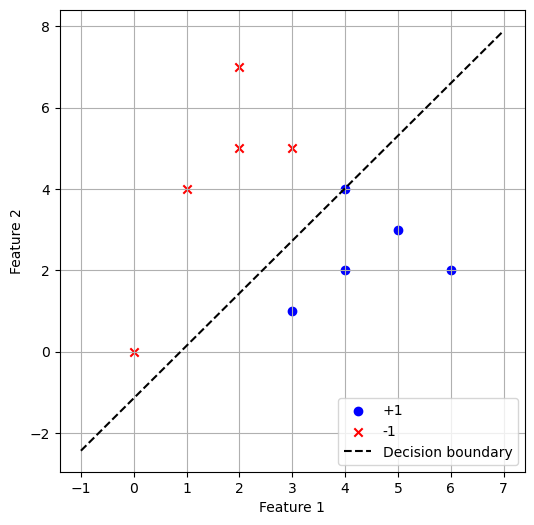

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([[4, 2], [2, 5], [3, 1], [0, 0], [1, 4], [5, 3], [6, 2], [2, 7], [3, 5], [4, 4]])
y = np.array([1, -1, 1, -1, -1, 1, 1, -1, -1, 1])  # Labels


#### START YOUR CODE ####
# Initialize theta and theta_0 (1 pt each, 3pts in total)
theta = np.zeros(X.shape[1])
print(theta)
theta_0 = 0
tau = 1000  # Maximum number of iterations of your choice, keep it reasonable.

def perceptron(X, y, theta, theta_0, tau): # (12pts)
    
    #TODO: Write your perceptron code here...
    for t in range(tau):
        changed = False
        for i in range(len(X)):
            if y[i] * np.dot(theta,X[i]) + theta_0 <= 0:
                theta = theta + (y[i] * X[i])
                theta_0 = theta_0 + y[i]
                changed = True
        if not changed:
            break
    return theta, theta_0

#### END YOUR CODE ####

## Do not change the following code
# Train the perceptron
final_theta, final_theta_0 = perceptron(X, y, theta, theta_0, tau)
# Print final results
print("Final theta:", final_theta)
print("Final theta_0:", final_theta_0)
# Plot your results
pos = X[y == 1]
neg = X[y == -1]
plt.figure(figsize=(6,6))
plt.scatter(pos[:,0], pos[:,1], c='blue', label='+1', marker='o')
plt.scatter(neg[:,0], neg[:,1], c='red', label='-1', marker='x')

# Plot decision boundary
xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
if final_theta[1] != 0:
    yy = -(final_theta[0]*xx + final_theta_0) / final_theta[1]
    plt.plot(xx, yy, 'k--', label='Decision boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


## Task 9 (15 points): Implementing the kNN Algorithm From Scratch
Given the pseudocode, implement the simple k-Nearest Neighbors algorithm using the provided skeleton code in Python.
**Pseudocode**:
<div style="display: flex; align-items: center;">
    <img src="fall2025_hw1_knn_alg.png" alt="Homework1 Figure3" width="700"/>
    <p style="margin-left: 20px;"> 
    </p>
</div>


**Expected output**:
```
Test Point: (5, 5)
k-Nearest Neighbors: [(np.float64(1.0), 1), (np.float64(2.23606797749979), 0), (np.float64(2.23606797749979), 0), (np.float64(2.23606797749979), 1), (np.float64(2.8284271247461903), 1)]
Predicted Class: 1
```

## Load data

In [30]:
dataset = [
    # Class 0 
    (1, 2, 0), (2, 1, 0), (2, 3, 0), (3, 2, 0), (1, 4, 0),
    (3, 1, 0), (4, 2, 0), (2, 5, 0), (3, 4, 0), (4, 3, 0),

    # Class 1 
    (6, 5, 1), (7, 6, 1), (8, 5, 1), (7, 7, 1), (6, 8, 1),
    (8, 7, 1), (9, 6, 1), (7, 8, 1), (8, 9, 1), (9, 8, 1)
]

# Test point
test_point = (5, 5)

In [31]:
# Instantiate and train the KNN classifier
k = 5  # Number of neighbors

## Implement kNNClassifier from Scratch

In [32]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

#### START YOUR CODE ####
# Step 1: Compute Euclidean distance from test_point to all points in dataset
distances = []
#TODO: Use for loop to compute Euclidean distance from test_point to all points in dataset # 3pts
for point in dataset:
    dist = np.sqrt((point[0]-test_point[0])**2 + (point[1]-test_point[1])**2)
    distances.append((dist, point[2]))
# Step 2: Sort distances in ascending order
#TODO: Sort distances in ascending order 3pts
distances.sort(key=lambda x: x[0])
# Step 3: Select k nearest neighbors
#TODO: Select k nearest neighbors 3pts
k_nearest = distances[:k]
# Step 4: Count the most common class label among k neighbors using counter 
labels = [label for _, label in k_nearest] # get all labels of the k nearest neighbors 3pts
predicted_class = Counter(labels).most_common(1)[0][0] #Find the most common class label as the prediction 3pts
#### END YOUR CODE ####

## Do not change the following code
# Print results
print(f"Test Point: {test_point}")
print(f"k-Nearest Neighbors: {k_nearest}")
print(f"Predicted Class: {predicted_class}")

Test Point: (5, 5)
k-Nearest Neighbors: [(np.float64(1.0), 1), (np.float64(2.23606797749979), 0), (np.float64(2.23606797749979), 0), (np.float64(2.23606797749979), 1), (np.float64(2.8284271247461903), 1)]
Predicted Class: 1


## Task 10 (10 points): Implementing the kNN Algorithm using 'sklearn'
In this task, you will practice implementing K-Nearest Neighbors (KNN) using `sklearn`. This includes functionality for a basic KNN classifier and evaluate its performance on iris dataset.

You can install `sklearn` by running the following command in terminal:

```
!pip install scikit-learn
```

## Load Data

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
    
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Instantiate and train the KNN classifier
k = 3  # Number of neighbors

## Implement kNNClassifier using 'sklearn'

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


# Initialize and train the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k) #3 pts
knn_classifier.fit(X_train, y_train) #3 pts

# Predict labels for the test set
predictions = knn_classifier.predict(X_test) #3 pts

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions) #1 pt

# Evaluate the accuracy
### DO NOT CHANGE THE CODE BELOW ###
print("Predicted Labels:", predictions)
print("Actual Labels:   ", y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Predicted Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual Labels:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 100.00%


## Section 4: Logistic Regression Objective
This section includes 5 tasks, marked as TODO/None in the code:

**TODOs in the code**
- Task 11.1: Implement the logistic function (5 points)
- Task 11.2: Compute the Negative Log-Likelihood Loss Function (5 points)
- Task 11.3: Implement the Logistic Regression Objective Function (5 points)
- Task 11.4: Calculate the objective for each value of theta (5 points)
- Task 11.5: Create plot of the objective function vs theta (5 points)


## Task 11 (25 points): 
**Problem Description**

You are provided with a dataset sampled from a logistic function. Your task is to implement and plot the logistic regression cost function $ J_{\text{lr}} $.

The logistic regression objective is defined as:

$$
J_{\text{lr}}(\theta, \theta_0) = \frac{1}{n} \sum_{i=1}^{n} L_{\text{nll}}\left(\sigma(\theta^\top x^{(i)} + \theta_0), y^{(i)}\right)
$$

where the negative log-likelihood loss function $ L_{\text{nll}} $ is:

$$
L_{\text{nll}}(g, a) = -\left( \mathbb{1}(a = +1) \log(g) + \mathbb{1}(a \neq +1) \log(1 - g) \right)
$$



In [36]:
# Given dataset dataset (X,y) = [(x_1,y_1), ... (x_m,y_m)]. 
# X contains features of all m data points, y contains labels for all m data points.
import numpy as np
np.random.seed(0)
m = 100  # Number of points
X = np.random.randn(m)  # Single feature (random)
y = ((1 / (1 + np.exp(-X))) > 0.5).astype(int) * 2 - 1  # Labels (+1 or -1)

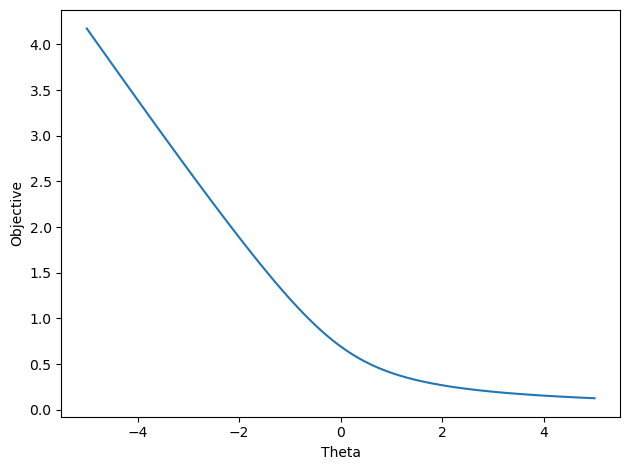

In [37]:
import numpy as np
import matplotlib.pyplot as plt


#### START YOUR CODE ####
# Task 11.1: Define the Logistic Function
def logistic_function(z):
    """
    Compute the logistic function of z.
    Fill in the function to compute the logistic function.
    """
    # TODO: Implement the logistic function 
    return 1 / (1 + np.exp(-z))  # Placeholder 5pts

# Task 11.2: Define the Negative Log-Likelihood Loss Function
def negative_log_likelihood(g, a):
    """
    Compute the negative log-likelihood loss.
    g: Predicted probability (logistic output)
    a: Actual label (+1 or -1)
    """
    # TODO: Fill in the condition to compute the loss for positive and negative labels
    if a == 1:
        return -np.log(g)
    else:
        return -np.log(1 - g)

# Task 11.3: Implement the Logistic Regression Objective Function
def logistic_regression_objective(X, y, theta, theta_0):
    """
    Compute the logistic regression objective J_lr for the dataset X, y.
    X: Dataset features
    y: Dataset labels
    theta: Weights (parameters)
    theta_0: Bias term
    """
    m = len(y)  # Number of samples
    total_loss = 0
    
    # Loop over all examples
    for i in range(m):
        z = np.dot(X[i], theta) + theta_0  # raw linear prediction 1 pts
        g = logistic_function(z)  # Logistic prediction
        
        # TODO: Add the loss to the total objective 2pts
        total_loss += negative_log_likelihood(g, y[i])  # Compute the loss and add it here.
    # Return the average objective
    return total_loss / m  # Placeholder 2pts



# Varying theta to plot the objective function as a function of theta
theta_values = np.linspace(-5, 5, 100)  # Values of theta to test
theta_0 = 0  # Fixing bias at 0

# Task 11.4: Calculate the objective for each value of theta. 5pts
objectives = []
# TODO: Calculate the objective for each value of theta, and store all of them in a list
for theta in theta_values:
    obj = logistic_regression_objective(X, y, np.array([theta]), theta_0)
    objectives.append(obj)
# Task 11.5: Create plot of the objective function vs theta
# TODO: Create plot of the objective function vs theta (3pts). Name x label 'Theta' (1pt), y label 'Objective'(1pt)
plt.plot(theta_values, objectives)
plt.xlabel('Theta')
plt.ylabel('Objective')

#### END YOUR CODE ####
# Display the subplots
plt.tight_layout()
plt.show()
